1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [13]:
import numpy as np
from numpy.linalg import eig, svd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [30]:

# Function to generate the dataset
def generate_dataset(N):
    np.random.seed(0)  # Seed for reproducibility
    # Generating x1, x2, x3
    x1 = np.random.normal(0, 1, N)       # x1 ~ N(0,1)
    x2 = x1 + np.random.normal(0, 3, N)  # x2 ~ x1 + N(0,3)
    x3 = 2 * x1 + x2                     # x3 = 2x1 + x2
    # Combine into a single dataset
    X = np.column_stack((x1, x2, x3))
    return X
# Number of entries
N = 1000
# Generate the dataset
dataset = generate_dataset(N)
# Display the first 5 rows of the dataset
print(dataset[:5])

[[ 1.76405235  3.43194039  6.96004508]
 [ 0.40015721  3.07757887  3.87789329]
 [ 0.97873798 -0.28820649  1.66926948]
 [ 2.2408932   2.55503529  7.03682169]
 [ 1.86755799  2.55171797  6.28683395]]


In [32]:
# Find eigenvectors and eigenvalues using eigendecomposition of the covariance matrix
cov_matrix = np.cov(dataset.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvectors


array([[-0.1171539 , -0.81649658,  0.5653391 ],
       [-0.57524227, -0.40824829, -0.70882273],
       [-0.80955006,  0.40824829,  0.42185547]])

In [33]:
# Perform PCA using SVD
u, s, vh = np.linalg.svd(dataset.T, full_matrices=False)
svd_eigenvalues = s**2 / (N-1)
svd_eigenvectors = vh.T
svd_eigenvalues
svd_eigenvectors


array([[-4.95364200e-02,  3.36580256e-02,  7.19450271e-01],
       [-3.14146179e-02, -7.19578187e-03,  6.84025389e-01],
       [-8.24307865e-03,  3.28164119e-02, -3.18435509e-03],
       ...,
       [-6.03487553e-03, -6.94375941e-04,  2.30750178e-04],
       [ 5.27687762e-02, -6.79740622e-03,  1.31267954e-02],
       [ 4.16016420e-02,  1.63532255e-02,  2.45305332e-03]])

In [35]:
# Calculate the explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
explained_variance

array([9.26319117e-01, 6.53112892e-17, 7.36808828e-02])

In [38]:
# Calculate the cumulative variance explained by the principal components
cumulative_variance = np.cumsum(explained_variance)
# Find the number of components needed to retain at least 99% of the total variability
n_components_99 = np.argmax(cumulative_variance >= 99) + 1  # Adding 1 because index starts at 0

In [40]:
# Transform the data to the new PCA basis using all three components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(dataset)
X_pca


array([[ 7.90004605e+00,  1.56328810e+00,  5.59266182e-15],
       [ 5.04126054e+00, -2.56818240e-01,  1.64577540e-15],
       [ 1.38491000e+00,  1.52430124e+00,  6.18995912e-17],
       ...,
       [ 1.03685084e+00,  3.18001948e-02, -1.43956271e-17],
       [-8.24095753e+00, -2.42144871e-01, -6.37327536e-17],
       [-6.47927738e+00,  7.89287728e-01,  6.20488124e-17]])

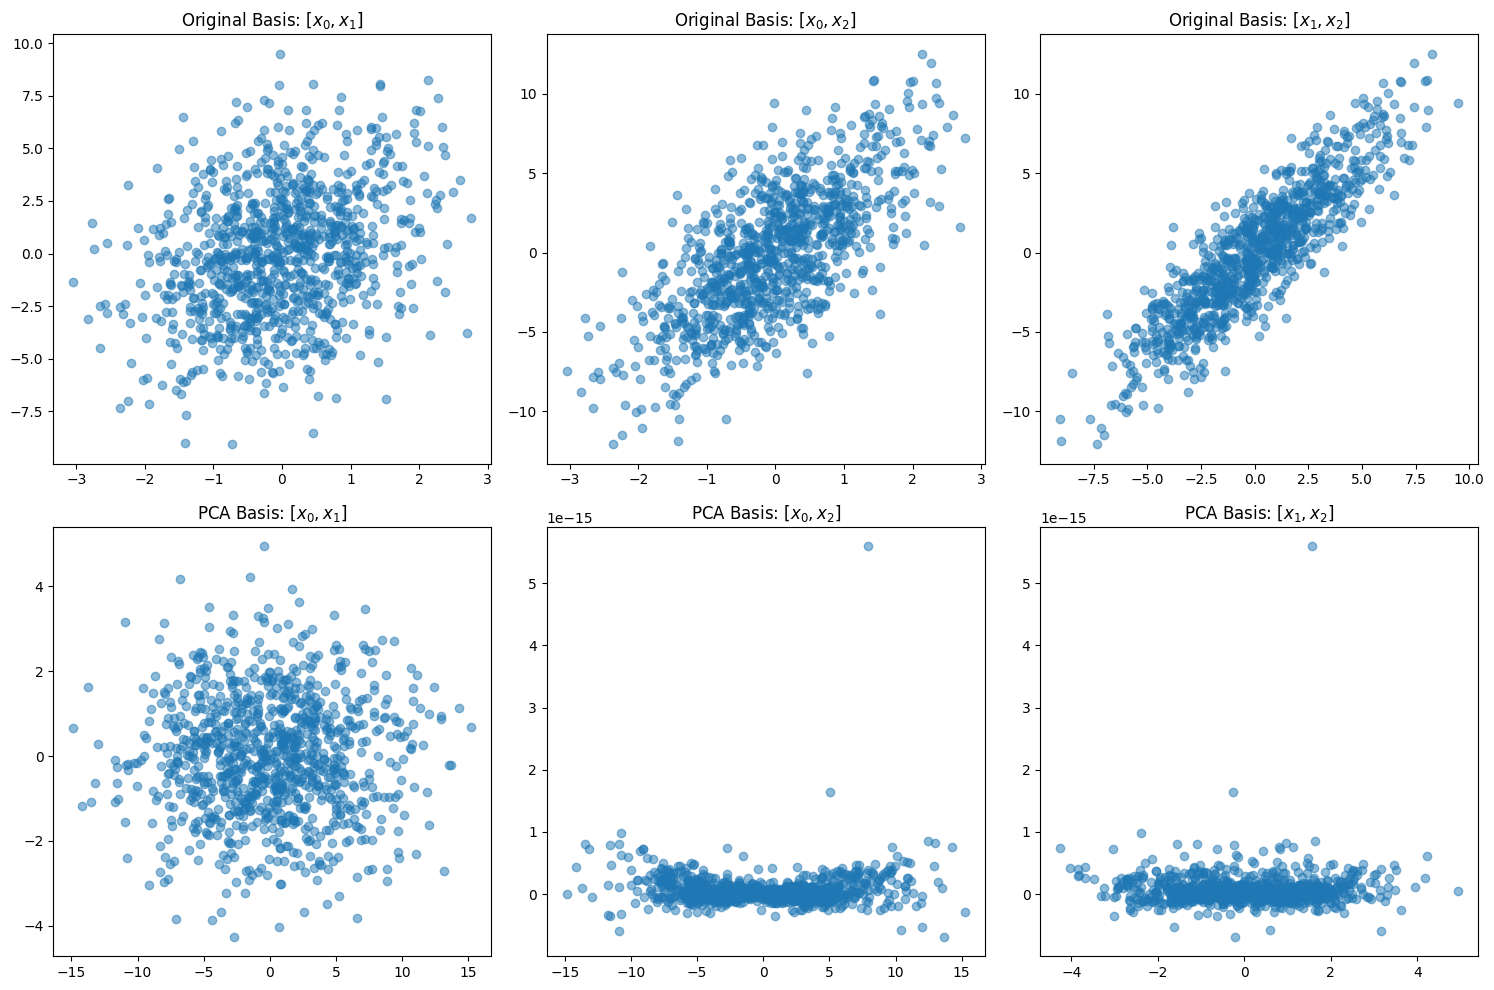

In [44]:
import matplotlib.pyplot as plt

# Plot the data in both original and PCA-transformed basis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Scatter plots for the original data
axs[0, 0].scatter(dataset[:, 0], dataset[:, 1], alpha=0.5)
axs[0, 0].set_title('Original Basis: $[x_0, x_1]$')
axs[0, 1].scatter(dataset[:, 0], dataset[:, 2], alpha=0.5)
axs[0, 1].set_title('Original Basis: $[x_0, x_2]$')
axs[0, 2].scatter(dataset[:, 1], dataset[:, 2], alpha=0.5)
axs[0, 2].set_title('Original Basis: $[x_1, x_2]$')

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(dataset)

# Scatter plots for the PCA-transformed data
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
axs[1, 0].set_title('PCA Basis: $[x_0, x_1]$')
axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 2], alpha=0.5)
axs[1, 1].set_title('PCA Basis: $[x_0, x_2]$')
axs[1, 2].scatter(X_pca[:, 1], X_pca[:, 2], alpha=0.5)
axs[1, 2].set_title('PCA Basis: $[x_1, x_2]$')

plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [15]:
# Add uncorrelated random noise
np.random.seed(1)  # For reproducibility
noise = np.random.normal(0, 0.05, (N, 10))  # Noise with smaller std deviation
dataset_noisy = np.hstack((dataset, noise))  # Add noise to the original dataset
dataset_noisy

array([[ 1.76405235e+00,  3.43194039e+00,  6.96004508e+00, ...,
        -3.80603450e-02,  1.59519548e-02, -1.24685188e-02],
       [ 4.00157208e-01,  3.07757887e+00,  3.87789329e+00, ...,
        -4.38929209e-02,  2.11068734e-03,  2.91407607e-02],
       [ 9.78737984e-01, -2.88206488e-01,  1.66926948e+00, ...,
        -4.67884717e-02, -1.33944040e-02,  2.65177733e-02],
       ...,
       [ 9.41923003e-02,  5.69493841e-01,  7.57878441e-01, ...,
        -2.04489996e-02,  6.53196622e-02,  3.48778437e-03],
       [-1.14761094e+00, -4.57331520e+00, -6.86853709e+00, ...,
         8.12831767e-02, -3.33849545e-02,  1.70793023e-02],
       [-3.58114075e-01, -4.29102519e+00, -5.00725334e+00, ...,
        -5.07071908e-02, -3.13481132e-03, -7.18934946e-02]])

In [18]:
# Perform PCA on the noisy dataset
cov_matrix_noisy = np.cov(dataset_noisy.T)
eigenvalues_noisy, eigenvectors_noisy = np.linalg.eig(cov_matrix_noisy)
# Calculate the explained variance for the noisy dataset
explained_variance_noisy = eigenvalues_noisy / np.sum(eigenvalues_noisy)
explained_variance_noisy

array([9.25462293e-01, 7.36131943e-02, 2.92993907e-17, 1.11069152e-04,
       1.05695160e-04, 9.94904075e-05, 9.87224066e-05, 7.62788514e-05,
       9.26818816e-05, 9.04475954e-05, 8.05049766e-05, 8.63845056e-05,
       8.32381063e-05])

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [20]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [21]:
import pandas as pd
magic_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
magic_data = pd.read_csv(magic_url, header=None)


In [26]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
magic_scaled = scaler.fit_transform(magic_data.iloc[:, :-1])  # Exclude the label column

# Perform PCA
pca_magic = PCA()
magic_pca = pca_magic.fit_transform(magic_scaled)
# Calculate the explained variance
explained_variance_magic = pca_magic.explained_variance_ratio_
explained_variance_magic

array([0.42239909, 0.15751879, 0.10118053, 0.09940127, 0.07420194,
       0.06500865, 0.04075386, 0.02203624, 0.01547534, 0.00202429])